In [234]:
import itertools
from pathlib import Path

import numpy as np

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.image as mimage
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.offsetbox as moffsetbox

from scipy.stats import dirichlet
from mpltern.datasets import get_dirichlet_pdfs, get_triangular_grid

import papercolors as pc
from papercolors import colordict as pcd

mpl.rcParams['font.family'] = 'dejavu sans'
mpl.rcParams['figure.dpi'] = 300
fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
paper_path = Path('../figures/')

In [333]:
mosaic = np.array([[r'$\tau$',r'$K$', r'$S$', r'$\rho$'],
          [r'$\hat{\phi}^*_{E}\tau$', r'$K^{\prime}$', r'$S^{\prime}$', r'$\hat{\phi}^*_{H}\rho$'], 
          [r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$', '.', '.', r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$']])
rotation = 30
per_subplot_kw = {r'$K$': {'projection':'ternary'},  r'$K^{\prime}$' : {'projection': 'ternary', 'rotation':30}, 
                  r'$S$': {'projection':'ternary'}, r'$S^{\prime}$' :  {'projection': 'ternary', 'rotation':30}, 
                   r'$\rho$': {'projection':'ternary'},  r'$\hat{\phi}^*_{H}\rho$': {'projection': 'ternary', 'rotation':30}, 
                   r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$':{'projection': 'ternary', 'rotation':30}}

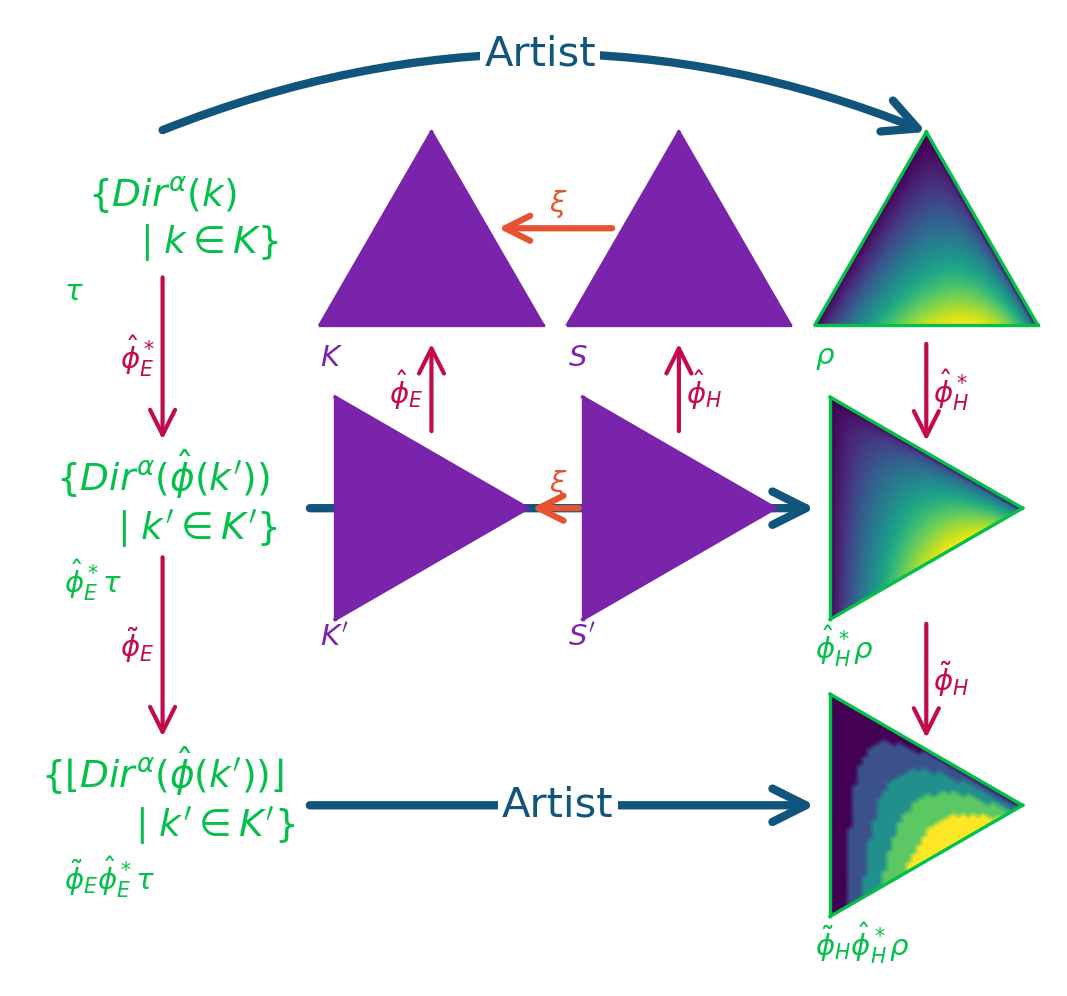

In [361]:
fig, axd = plt.subplot_mosaic(mosaic, figsize=(3.5, 3), layout='compressed', 
                              per_subplot_kw = per_subplot_kw)
for t, ax in axd.items():
    #ax.text(.5, .5, t, transform=ax.transAxes, color=pcd['monoid'], alpha=.25, size=25, ha='center', va='center')
    ax.set(xticks=[], yticks=[], aspect='equal')
    #ax.set_title(t, color=pcd['monoid'])

for an in per_subplot_kw:
    axd[an].taxis.set_ticks([])
    axd[an].laxis.set_ticks([])
    axd[an].raxis.set_ticks([])

    
alpha = (1, 1.5, 2)
rv = dirichlet(alpha)
t, l, r = get_triangular_grid(n=40)
v = [rv.pdf((ti, li, ri)) for ti, li, ri in zip(t, l, r)]

cmap = plt.get_cmap("viridis")
shading = "gouraud"

cs1 = axd[r'$\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)
cs2 = axd[r'$\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)

bins, edges = np.histogram(v, bins=5)
norm = mcolors.BoundaryNorm([0,1,2,3,4,5], cmap.N)
cs3 = axd[ r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'].tripcolor(t, l, r, v, cmap=cmap, norm=norm, shading=shading, rasterized=True)

for an in [r'$K$', r'$S$', r'$K^{\prime}$', r'$S^{\prime}$']:
    axd[an].margins(.5)
    axd[an].spines[:].set_color(pcd['base'])
    axd[an].patch.set_facecolor(pcd['base'])
    axd[an].annotate(an, xy=(0,-.1), xycoords=axd[an].transAxes, va='top', ha='left', color=pcd['base'], fontsize=fs['script'])

for an in [l for l in axd if l.endswith('rho$')]:
    axd[an].annotate(an, xy=(0, -.1), xycoords=axd[an].transAxes, va='top', ha='left', color=pcd['section'], fontsize=fs['script'])
    axd[an].spines[:].set_edgecolor(pcd['section'])
    
for an in [l for l in axd if l.endswith('tau$')]:
    axd[an].annotate(an , xy=(0, .25), xycoords=axd[an].transAxes, va='top', ha='left', color=pcd['section'], fontsize=fs['script'])
    axd[an].axis('off')


t1 = axd[r'$\tau$'].text(.5, .55, r"$\{Dir^{\alpha}(k)$" + "\n       " + r"$ \mid k \in K \}$", 
                         transform=axd[r'$\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])
t2 = axd[r'$\hat{\phi}^*_{E}\tau$'].text(.5, .55, r"$\{Dir^{\alpha}(\hat{\phi}(k^{\prime}))$" + "\n     "+ r"$\mid k^{\prime} \in K^{\prime}\}$", 
                                         transform=axd[r'$\hat{\phi}^*_{E}\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])
#
t3 = axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].text(.5, .55, r"$\{\lfloor Dir^{\alpha}(\hat{\phi}(k^{\prime}))\rfloor$"+ "\n        " +  r"$\mid k^{\prime} \in K^{\prime}\}$", 
                                         transform=axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].transAxes, fontsize=fs['small'], va='center', ha='center', color=pcd['section'])


# arrows: annotate: tail, head, tail=text, xy=head
#artists
a1 =  mpatches.ConnectionPatch(xyA = (.5, 1), xyB = (.5,1), 
                               coordsA = axd[r'$\tau$'].transAxes, axesA=axd[r'$\tau$'], 
                               coordsB = axd[r'$\rho$'].transAxes, axesB=axd[r'$\rho$'], 
                               arrowstyle="->", color=pcd['artist'], connectionstyle='arc3, rad=-.2', mutation_scale=20, lw=2)
fig.add_artist(a1)

a2 =  mpatches.ConnectionPatch(xyA = (1.25, .5), xyB = (0, .5), 
                               coordsA = axd[r'$\hat{\phi}^*_{E}\tau$'].transAxes, axesA=axd[r'$\hat{\phi}^*_{E}\tau$'], 
                               coordsB = axd[r'$\hat{\phi}^*_{H}\rho$'].transAxes, axesB=axd[r'$\hat{\phi}^*_{H}\rho$'], 
                               arrowstyle="->", color=pcd['artist'], mutation_scale=20, lw=2, zorder=-5)
fig.add_artist(a2)

a3 =  mpatches.ConnectionPatch(xyA = (1.25, .5), xyB = (0, .5), 
                               coordsA = axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'].transAxes, axesA=axd[r'$\tilde{\phi}_{E}\hat{\phi}^*_{E}\tau$'], 
                               coordsB = axd[r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'].transAxes, axesB=axd[r'$\tilde{\phi}_{H}\hat{\phi}^*_{H}\rho$'], 
                               arrowstyle="->", color=pcd['artist'], mutation_scale=20, lw=2)
fig.add_artist(a3)

for arr, y in [(a1, 1), (a3, .5)]:
    offsetbox = moffsetbox.TextArea("Artist", textprops=dict( color=pcd['artist']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, y), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none'), pad=.1)
    fig.add_artist(ab1)


#phi_s 
e = mosaic[:,0]
h = mosaic[:,-1]

for tail, head, lab in [(e[0], e[1], r"$\hat{\phi}^*_{E}$"), (e[1], e[2],r"$\tilde{\phi}_{E}$"), (h[0], h[1], r"$\hat{\phi}^*_{H}$"), (h[1], h[2],r"$\tilde{\phi}_{H}$")]:

    ya, yb = (-.1, .85) if lab.endswith('{H}$') else (.25, .85)
    
    arr =  mpatches.ConnectionPatch(xyA = (.5, ya), xyB = (.5, yb), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['monoid'], mutation_scale=15, lw=1, zorder=-5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['monoid'], fontsize=fs['script']))
    off = -.5 if lab.endswith('{E}$') else 1.5
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (off, .5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

b = mosaic[0:-1,1:-1]

for tail, head, lab in [(b[1,0], b[0,0], r"$\hat{\phi}_{E}$"), (b[1,1], b[0,1], r"$\hat{\phi}_{H}$")]:
    arr =  mpatches.ConnectionPatch(xyA = (.5, .9), xyB = (.5, -.1), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['monoid'], mutation_scale=15, lw=1, zorder=-5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(lab, textprops=dict( color=pcd['monoid'], fontsize=fs['script']))
    off = -.5 if lab.endswith('{E}$') else 1.5
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (off, .5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

for tail, head, (xa, xb) in [(b[0,1], b[0,0], (.2, .8)), (b[1,1], b[1,0], (.05, .95))]:
    arr =  mpatches.ConnectionPatch(xyA = (xa, .5), xyB = (xb, .5), 
                               coordsA = axd[tail].transAxes, axesA=axd[tail], 
                               coordsB = axd[head].transAxes, axesB=axd[head], 
                               arrowstyle="->", color=pcd['functor'], mutation_scale=15, lw=1.5, zorder=5)
    fig.add_artist(arr)
    
    offsetbox = moffsetbox.TextArea(r"$\xi$", textprops=dict( color=pcd['functor'], fontsize=fs['script']))
    
    ab1 = moffsetbox.AnnotationBbox(offsetbox, (.5, 1.5), xybox=(0, 0), xycoords=arr,
                                     boxcoords="offset points", bboxprops=dict(boxstyle=None, edgecolor='none', facecolor='none'), pad=.1)
    fig.add_artist(ab1)

In [107]:
np.fix(v[100])

np.float64(0.0)

In [111]:
v[200]

np.float64(1.616678475916746)

In [110]:
np.floor(v[200])

np.float64(1.0)